In [1]:
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [2]:
netG = ResNetGenerator()

In [6]:
!wget http://mng.bz/8pKP --no-check-certificate

--2021-09-05 10:19:36--  http://mng.bz/8pKP
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/8pKP [following]
--2021-09-05 10:19:36--  https://mng.bz/8pKP
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip [following]
--2021-09-05 10:19:37--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.244.190
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘8pKP’

8pKP                100%[===================>] 1

In [7]:
!unzip /content/8pKP

Archive:  /content/8pKP
   creating: horse2zebra/
   creating: horse2zebra/trainA/
  inflating: horse2zebra/trainA/n02381460_6223.jpg  
  inflating: horse2zebra/trainA/n02381460_1567.jpg  
  inflating: horse2zebra/trainA/n02381460_3354.jpg  
  inflating: horse2zebra/trainA/n02381460_299.jpg  
  inflating: horse2zebra/trainA/n02381460_3001.jpg  
  inflating: horse2zebra/trainA/n02381460_4242.jpg  
  inflating: horse2zebra/trainA/n02381460_1666.jpg  
  inflating: horse2zebra/trainA/n02381460_4396.jpg  
  inflating: horse2zebra/trainA/n02381460_4502.jpg  
  inflating: horse2zebra/trainA/n02381460_8527.jpg  
  inflating: horse2zebra/trainA/n02381460_14.jpg  
  inflating: horse2zebra/trainA/n02381460_706.jpg  
  inflating: horse2zebra/trainA/n02381460_4019.jpg  
  inflating: horse2zebra/trainA/n02381460_1478.jpg  
  inflating: horse2zebra/trainA/n02381460_3449.jpg  
  inflating: horse2zebra/trainA/n02381460_5558.jpg  
  inflating: horse2zebra/trainA/n02381460_969.jpg  
  inflating: horse2ze

In [13]:
!wget https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/d6c0210143daa133bbdeddaffc8993b1e17b5174/data/p1ch2/horse2zebra_0.4.0.pth?raw=true

--2021-09-05 10:25:41--  https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/d6c0210143daa133bbdeddaffc8993b1e17b5174/data/p1ch2/horse2zebra_0.4.0.pth?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/d6c0210143daa133bbdeddaffc8993b1e17b5174/data/p1ch2/horse2zebra_0.4.0.pth [following]
--2021-09-05 10:25:42--  https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/d6c0210143daa133bbdeddaffc8993b1e17b5174/data/p1ch2/horse2zebra_0.4.0.pth
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/deep-learning-with-pytorch/dlwpt-code/d6c0210143daa133bbdeddaffc8993b1e17b5174/data/p1ch2/horse2zebra_0.4.0.pth [following]
--2021-09-05 10:25:42--  https://raw.githubusercontent.com/deep-learning-with-

In [14]:
model_path = '/content/horse2zebra_0.4.0.pth?raw=true'
model_data = torch.load(model_path)
netG.load_state_dict(model_data)

<All keys matched successfully>

In [15]:
netG.eval()

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [17]:
from PIL import Image 
from torchvision import transforms  

In [19]:
preprocess = transforms.Compose([
                                 transforms.Resize(256), 
                                 transforms.ToTensor()
])

In [20]:
img = Image.open('/content/horse2zebra/testA/n02381460_1000.jpg')

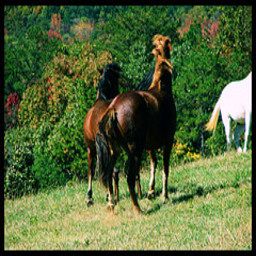

In [21]:
img

In [22]:
img_t = preprocess(img)

In [23]:
img_t

tensor([[[0.0078, 0.0000, 0.0039,  ..., 0.0078, 0.0078, 0.0000],
         [0.0157, 0.0118, 0.0118,  ..., 0.0000, 0.0078, 0.0039],
         [0.0118, 0.0235, 0.0157,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0078, 0.0000, 0.0000,  ..., 0.0000, 0.0078, 0.0078],
         [0.0078, 0.0157, 0.0118,  ..., 0.0118, 0.0039, 0.0157],
         [0.0000, 0.0078, 0.0000,  ..., 0.0235, 0.0039, 0.0196]],

        [[0.0078, 0.0039, 0.0078,  ..., 0.0157, 0.0118, 0.0000],
         [0.0157, 0.0118, 0.0118,  ..., 0.0078, 0.0118, 0.0078],
         [0.0118, 0.0157, 0.0078,  ..., 0.0039, 0.0078, 0.0078],
         ...,
         [0.0078, 0.0000, 0.0000,  ..., 0.0039, 0.0118, 0.0039],
         [0.0078, 0.0196, 0.0118,  ..., 0.0118, 0.0000, 0.0118],
         [0.0000, 0.0078, 0.0000,  ..., 0.0157, 0.0000, 0.0118]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0118, 0.0275, 0.0196],
         [0.0235, 0.0118, 0.0039,  ..., 0.0039, 0.0196, 0.0235],
         [0.0196, 0.0275, 0.0118,  ..., 0.0000, 0.0039, 0.

In [24]:
batch_t = torch.unsqueeze(img_t, 0 ) 

In [25]:
batch_out = netG(batch_t)

In [26]:
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)

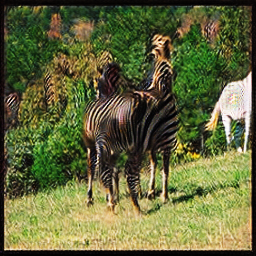

In [28]:
out_img

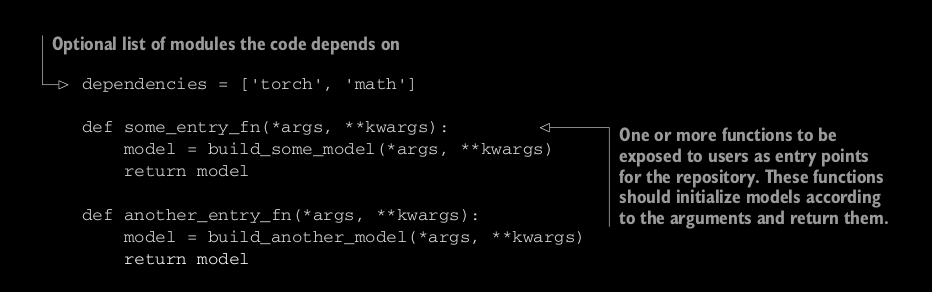

# loading model from github repo 

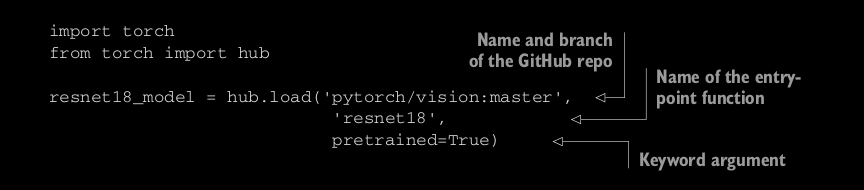